# Final Project - Group 11
**Group Lead:** Yanhui Wu  
**Group Members:** Zhixing Liu, Nilgun Aslanova, Manuel Chavez, Feiyu Lin, Meghana Nekkanti

## Ask 1 - Search for a dataset

For the project, our group would like to look into this dataset about comprehensive financial transactions conducted by the City of Los Angeles for the year 2022. It includes details of payments made by the city to various vendors and entities, covering aspects like transaction amounts, dates, payees, and descriptions of the services or goods procured.

### Dataset source
The dataset is publicly available and sourced from the Los Angeles City Controller's office, specifically from their open data portal at https://controller.lacity.gov/data. This portal is part of the city's initiative to promote transparency and accountability in public spending.

You can download the dataset in the CSV format here https://controllerdata.lacity.org/api/views/mkec-7zmd/rows.csv?accessType=DOWNLOAD&api_foundry=true. The dataset's size is 413MB and is last updated on 11/22/2023. The dataset has 700145 records at the transactional level and 62 variables. Each record represents a transaction and provides the following information.

You can find the data dictionary and more information about each field here (https://controllerdata.lacity.org/Purchasing/2020-Checkbook-Data/mkec-7zmd)

### Why this dataset?

The dataset stands out for its tidy and organized structure, which contributes to its analytical appeal. The meticulous organization of the 62 variables provides a clear and systematic framework for data exploration. This tidiness is crucial for researchers and analysts seeking to navigate and interpret the information efficiently. The detailed nature of the dataset allows for a granular understanding of resource allocation within the City of Los Angeles. By delving into specific variables related to expenditures, vendors, departments, and fund types, users can gain valuable insights into how financial resources are allocated across various sectors. This level of detail facilitates a comprehensive analysis, enabling a nuanced exploration of patterns and trends in resource distribution, ultimately aiding in informed decision-making processes.

### Is this dataset suitable for dimensional modeling and analytical analysis?

Yes. The dataset is well-structured and organized, which is essential for effective dimensional modeling. It includes clear, defined fields such as date, amount, vendor, department, and account, making it easy to map into a dimensional model. Secondly, the dataset provides data at a transactional level, which is ideal for creating a detailed and comprehensive dimensional model.

### Analytical Questions we can answer with this data

##### 1. What are the top three highest-ranking vendors based on the total dollar amount of orders? Additionally, what is the count of orders for each of these top three vendors, and what percentage does each vendor's order count contribute to the overall activity in the dataset?

##### 2. What departments exhibit higher spending, and how is the government budget allocated among various activities within these departments?

##### 3. Which departments use most of the Special Revenue funds and the Capital Projects funds?

### Concerns with the data and changes we expect to overcome
1. The dataset, which is as ***large*** as 413MB and comprises more than 700k rows, poses challenges in terms of processing time for codes, leading to potential delays in data analysis.
2. Within the dataset, there are issues related to empty or redundant columns, contributing to ***data inefficiency and complexity***.
3. ***Data governance*** concerns are evident, indicating the need for improved oversight, policies, and procedures to ensure better management, quality, and accountability in the handling of the data.
4. The ***lack of metadata*** in the dataset is a notable issue, hindering the comprehensive understanding of the data's context, source, and attributes.
5. ***Inconsistent data formats*** further complicate data analysis and interpretation, requiring standardization efforts to enhance compatibility and reliability in analytical processes.

## Ask 2: Data Wrangling and Dimensional Modeling

Download the data using wget

In [1]:
!pwd

/home/ubuntu/notebooks/Checkbook_Data


In [2]:
!unzip 2020_Checkbook_Data.zip

Archive:  2020_Checkbook_Data.zip
  inflating: 2020_Checkbook_Data.csv  


use xsv headers to find the heading (attribute labels) of the 2020_Checkbook_Data.csv

In [3]:
!xsv headers 2020_Checkbook_Data.csv

1   ID NUMBER
2   FISCAL YEAR
3   DEPARTMENT NAME
4   VENDOR NAME
5   TRANSACTION DATE
6   DOLLAR AMOUNT
7   AUTHORITY
8   BUSINESS TAX REGISTRATION CERTIFICATE
9   GOVERNMENT ACTIVITY
10  FUND GROUP NAME
11  FUND TYPE
12  FUND NAME
13  FUND
14  ACCOUNT NAME
15  ACCOUNT CODE
16  TRANSACTION ID
17  EXPENDITURE TYPE
18  SETTLEMENT/JUDGMENT
19  FISCAL MONTH NUMBER
20  FISCAL YEAR-MONTH
21  FISCAL YEAR-QUARTER
22  CALENDAR MONTH NUMBER
23  CALENDAR MONTH/YEAR
24  CALENDAR MONTH
25  DATA SOURCE
26  AUTHORITY NAME
27  AUTHORITY LINK
28  DEPARTMENT NUMBER
29  PROGRAM
30  VENDOR ID
31  ZIP
32  PAYMENT METHOD
33  PAYMENT STATUS
34  INV NUM
35  INVOICE DUE DATE
36  INVOICE DISCOUNT DUE DATE
37  INV DATE
38  INV LINE
39  INVOICE DISTRIBUTION LINE
40  PO NUM
41  DESCRIPTION
42  DETAILED ITEM DESCRIPTION
43  UNIT PRICE
44  UNIT OF MEASURE
45  QUANTITY
46  SALES TAX PERCENT
47  SALES TAX
48  DISCOUNT
49  RECEIVER ID
50  PO DATE
51  PO LINE NUMBER
52  PROCUREMENT ORGANIZATION
53  BUYER NAME
54  SUPPL

There are **62** columns totally in the original dataset.

Since we want to analyze a few columns from the dataset, we can just select the columns which we want to keep and create a new csv file called *"2020_Checkbook_Data_cut"*.

- 3     DEPARTMENT NAME
- 4     VENDOR NAME
- 5     TRANSACTION DATE
- 6     DOLLAR AMOUNT
- 9     GOVERNMENT ACTIVITY
- 10	FUND GROUP NAME
- 11	FUND TYPE
- 12	FUND NAME
- 13	FUND
- 17	EXPENDITURE TYPE
- 19	FISCAL MONTH NUMBER
- 21	FISCAL YEAR-QUARTER
- 28	DEPARTMENT NUMBER
- 30	VENDOR ID
- 33	PAYMENT STATUS

- 37    INV DATE
- 40    PO NUM
- 41    DESCRIPTION

- 43	UNIT PRICE
- 45	QUANTITY
- 48	DISCOUNT

- 50    PO DATE

- 54	SUPPLIER CITY
- 55	SUPPLIER COUNTRY
- 58	ITEM CODE
- 59	ITEM CODE NAME
- 61	VALUE OF SPEND

In [4]:
!xsv select  3,4,5,6,9,10,11,12,13,17,19,21,28,30,33,37,40,41,43,45,48,50,54,55,58,59,61  2020_Checkbook_Data.csv > 2020_Checkbook_Data_cut.csv

use xsv count to check the number of lines in the 2020_Checkbook_Data_cut.csv

In [5]:
!xsv count 2020_Checkbook_Data_cut.csv

700145


use xsv headers to find the heading (attribute labels) of the 2020_Checkbook_Data_cut.csv

In [6]:
!xsv headers 2020_Checkbook_Data_cut.csv

1   DEPARTMENT NAME
2   VENDOR NAME
3   TRANSACTION DATE
4   DOLLAR AMOUNT
5   GOVERNMENT ACTIVITY
6   FUND GROUP NAME
7   FUND TYPE
8   FUND NAME
9   FUND
10  EXPENDITURE TYPE
11  FISCAL MONTH NUMBER
12  FISCAL YEAR-QUARTER
13  DEPARTMENT NUMBER
14  VENDOR ID
15  PAYMENT STATUS
16  INV DATE
17  PO NUM
18  DESCRIPTION
19  UNIT PRICE
20  QUANTITY
21  DISCOUNT
22  PO DATE
23  SUPPLIER CITY
24  SUPPLIER COUNTRY
25  ITEM CODE
26  ITEM CODE NAME
27  VALUE OF SPEND


now there are **27** columns in the new dataset

### Column description:
1. ***Department Name:*** The name of the department within the government that is making the transaction.
2. ***Vendor Name:*** Entities or businesses that the city has engaged with for various transactions.
3. ***Transaction Date:*** The date on which the transaction was recorded or processed.
4. ***Dollar Amount:*** The total amount of money involved in that transaction.
5. ***Government Activity:*** Description or identifier of the government activity associated with the transaction.
6. ***Fund Group Name:*** The name of the group of funds from which the transaction is being paid.
7. ***Fund Type:*** Classification or type of the fund that is being used for the transaction.
8. ***Fund Name:*** The specific name of the fund from which the transaction is being paid.
9. ***Fund:*** Coded identification of the fund being used.
10. ***Expenditure Type:*** The category of expenditure that the transaction falls under.
11. ***Fiscal Month Number:*** The numerical representation of the month in the fiscal calendar when the transaction was recorded.
12. ***Fiscal Year-Quarter:*** Identifier for the fiscal year and the quarter within which the transaction falls.
13. ***Department Number:*** Code assigned to the Departments involved
14. ***Vendor ID:*** ID code for the Vendors
15. ***Payment Status:*** Current state or condition of a financial transaction in terms of whether the payment associated with that transaction has been paid, is canceled, or may have a different status
16. ***Inv date:*** Issuance date of an invoice
17. ***PO Num:*** Unique reference assigned to a Purchase Order, facilitating tracking and communication between a buyer and seller in a business transaction.
18. ***Description:*** Description of the purchase order.
19. ***Unit Price:*** The cost per individual unit of the item purchased.
20. ***Quantity:*** The number of units purchased in the transaction.
21. ***Discount:*** Discount on purchased item
22. ***PO Date:*** Date of the Purchase Order.
23. ***Supplier City:*** The city where the supplier of the goods or services is located.
24. ***Supplier Country:*** The country where the supplier of the goods or services is located.
25. ***Item Code:*** Codes that identify the specific item purchased.
26. ***Item Code Name:*** The name associated with the item code.
27. ***Value of Spend:*** The calculated amount of money spent, typically based on the unit price multiplied by the quantity of items.

the first few rows of the dataset:

In [7]:
!xsv slice -l 5 2020_Checkbook_Data_cut.csv | xsv table

DEPARTMENT NAME  VENDOR NAME              TRANSACTION DATE  DOLLAR AMOUNT  GOVERNMENT ACTIVITY                      FUND GROUP NAME  FUND TYPE   FUND NAME       FUND  EXPENDITURE TYPE            FISCAL MONTH NUMBER  FISCAL YEAR-QUARTER  DEPARTMENT NUMBER  VENDOR ID  PAYMENT STATUS  INV DATE    PO NUM               DESCRIPTION                                                                        UNIT PRICE  QUANTITY  DISCOUNT  PO DATE     SUPPLIER CITY  SUPPLIER COUNTRY  ITEM CODE  ITEM CODE NAME  VALUE OF SPEND
HARBOR           RETAIL INDUSTRY LEADERS  01/14/2020        3500           TRANSPORTATION, COMMERCE AND ENTERPRISE  PROPRIETARY      ENTERPRISE  HARBOR REVENUE  702   MEMBERSHIPS                 7                    2020-03              42                 7515       PAID            12/02/2019  AFE5524              RETAIL INDUSTRY LEADERS ASSOCIATION MEMBERSHIP FOR CHRIS CHASE. INVOICE #4325                                      12/20/2019  BOSTON         US                      

use xsv stats to summarize the statistical infomation of each column

In [8]:
!xsv stats 2020_Checkbook_Data_cut.csv | xsv table

field                type     sum                 min                                                           max                                          min_length  max_length  mean                stddev
DEPARTMENT NAME      Unicode                      AGING                                                         ZOO                                          3           60                              
VENDOR NAME          Unicode                      (LA) R.S. HUGHES COMPANY, INC                                 ZW USA INC                                   3           68                              
TRANSACTION DATE     Unicode                      01/02/2020                                                    12/31/2019                                   10          10                              
DOLLAR AMOUNT        Float    8489878784.7898     -47388626.9                                                   174747762.7                                  1           11          12125

### Dimensional Modeling

We will start from this schema:

In [9]:
from IPython.display import Image
Image(url="https://github.com/Alfreddd555/DNSC6505_Group11/blob/main/original_checkbook_new.png?raw=true")

We will eventually build a dimensional schema like this:

In [10]:
from IPython.display import Image
Image(url="https://github.com/Alfreddd555/DNSC6505_Group11/blob/main/dimensions_new.png?raw=true")

First, use PostgreSQL's *dropdb* command to drop the database named project3, if it exists. It is necessary so that we can run this notebook repeatedly.

In [11]:
!dropdb -U student final_project

now use PostgreSQL's *createdb* command to create the database named project3.

In [12]:
!createdb -U student final_project

use sql magic command to connect to the database we just created

In [1]:
%load_ext sql

In [2]:
%sql postgresql://student@/final_project

#### Create "FACT" table: ***checkbook***

use the *CREATE TABLE* command to create a SQL table. Before creating a new table, it is a good practice to use *DROP TABLE* command to drop the table first then create it, in case the table already exists.

Now, we are creating the table ***checkbook*** as the fact table

In [15]:
%%sql
DROP TABLE IF EXISTS checkbook;

CREATE TABLE checkbook (
    DEPARTMENT_NAME                     VARCHAR,
    VENDOR_NAME                             VARCHAR,
    TRANSACTION_DATE                     DATE,
    DOLLAR_AMOUNT                         numeric(11)             NOT NULL,
    GOVERNMENT_ACTIVITY               VARCHAR,
    FUND_GROUP_NAME                    VARCHAR,
    FUND_TYPE                                    VARCHAR,
    FUND_NAME                                  VARCHAR,
    FUND                                              VARCHAR,
    EXPENDITURE_TYPE                       VARCHAR,
    FISCAL_MONTH_NUMBER              INTEGER,
    FISCAL_YEAR_QUARTER                  VARCHAR,
    DEPARTMENT_NUMBER                  INTEGER                  NOT NULL,
    VENDOR_ID                                    VARCHAR                 NOT NULL,
    PAYMENT_STATUS                          VARCHAR,

    INV_DATE                                DATE,
    PO_NUM                                         VARCHAR,
    DESCRIPTION                                 VARCHAR,

    UNIT_PRICE                                    numeric(10),
    QUANTITY                                      numeric(11),
    DISCOUNT                                      numeric(8),

    PO_DATE                                     DATE,

    SUPPLIER_CITY                                VARCHAR,
    SUPPLIER_COUNTRY                       VARCHAR(3),
    ITEM_CODE                                     VARCHAR,
    ITEM_CODE_NAME                         VARCHAR,
    VALUE_OF_SPEND                          numeric(11)
);

 * postgresql://student@/final_project
Done.
Done.


[]

In [16]:
%%sql
select * from checkbook

 * postgresql://student@/final_project
0 rows affected.


department_name,vendor_name,transaction_date,dollar_amount,government_activity,fund_group_name,fund_type,fund_name,fund,expenditure_type,fiscal_month_number,fiscal_year_quarter,department_number,vendor_id,payment_status,inv_date,po_num,description,unit_price,quantity,discount,po_date,supplier_city,supplier_country,item_code,item_code_name,value_of_spend


In [17]:
!pwd

/home/ubuntu/notebooks/Checkbook_Data


In [18]:
%%sql
COPY checkbook FROM '/home/ubuntu/notebooks/Checkbook_Data/2020_Checkbook_Data_cut.csv'
CSV
HEADER;

 * postgresql://student@/final_project
700145 rows affected.


[]

In [19]:
%%sql
select * from checkbook
limit 5;

 * postgresql://student@/final_project
5 rows affected.


department_name,vendor_name,transaction_date,dollar_amount,government_activity,fund_group_name,fund_type,fund_name,fund,expenditure_type,fiscal_month_number,fiscal_year_quarter,department_number,vendor_id,payment_status,inv_date,po_num,description,unit_price,quantity,discount,po_date,supplier_city,supplier_country,item_code,item_code_name,value_of_spend
HARBOR,RETAIL INDUSTRY LEADERS,2020-01-14,3500,"TRANSPORTATION, COMMERCE AND ENTERPRISE",PROPRIETARY,ENTERPRISE,HARBOR REVENUE,702,MEMBERSHIPS,7,2020-03,42,7515,PAID,2019-12-02,AFE5524,RETAIL INDUSTRY LEADERS ASSOCIATION MEMBERSHIP FOR CHRIS CHASE. INVOICE #4325,None,None,None,2019-12-20,BOSTON,US,None,None,None
HARBOR,AT&T CORP,2020-01-29,57525,"TRANSPORTATION, COMMERCE AND ENTERPRISE",PROPRIETARY,ENTERPRISE,HARBOR REVENUE,702,TELEPHONE SERVICE,7,2020-03,42,1990,PAID,2019-12-13,AG3333-000014027834,AT&T SERVICES UNDER AG3333 FOR ACCOUNT 9391035427 INVOICE 000014027834,None,None,None,2020-01-21,CAROL STREAM,US,None,None,None
HARBOR,A-THRONE CO. INC.,2020-01-03,67,"TRANSPORTATION, COMMERCE AND ENTERPRISE",PROPRIETARY,ENTERPRISE,HARBOR REVENUE,702,54025 MAINT SVCS- FAC&LAND,7,2020-03,42,3104,PAID,2019-12-01,EB16918,119969_156 - FENCE RENTAL @ 1050 WAYS (11/04/19 - 12/01/19) - INVOICE NO. 611923,None,None,None,2019-07-01,LONG BEACH,US,None,None,None
HARBOR,A-THRONE CO. INC.,2020-01-03,46,"TRANSPORTATION, COMMERCE AND ENTERPRISE",PROPRIETARY,ENTERPRISE,HARBOR REVENUE,702,54025 MAINT SVCS- FAC&LAND,7,2020-03,42,3104,PAID,2019-12-01,EB16919,XXXXXX_131 - FENCE RENTAL @ BERTH 93A (11/05/19 - 12/02/19) - INVOICE NO. 611924,None,None,None,2019-07-01,LONG BEACH,US,None,None,None
HARBOR,A-THRONE CO. INC.,2020-01-03,30,"TRANSPORTATION, COMMERCE AND ENTERPRISE",PROPRIETARY,ENTERPRISE,HARBOR REVENUE,702,54025 MAINT SVCS- FAC&LAND,7,2020-03,42,3104,PAID,2019-12-01,EB16920,XXXXXXX_131 - FENCE RENTAL @ BERTH 68 (11/22/19 - 12/19/19) - INVOICE NO. 611925,None,None,None,2019-07-01,LONG BEACH,US,None,None,None


#### Create dimension tables

##### Create ***department*** table, as a dimension table

In [20]:
%%sql
select distinct department_name, department_number
from checkbook
order by department_number
limit 10;

 * postgresql://student@/final_project
10 rows affected.


department_name,department_number
AGING,2
AIRPORTS,4
ANIMAL SERVICES,6
BUILDING AND SAFETY,8
NON_DEPARTMENTAL,8
CITY ADMINISTRATIVE OFFICER,10
NON_DEPARTMENTAL,10
PUBLIC ACCOUNTABILITY,11
CITY ATTORNEY,12
CANNABIS REGULATION,13


In [21]:
%%sql
DROP TABLE IF EXISTS department;

CREATE TABLE department(
    key                                     SERIAL              PRIMARY KEY,
    department_name             VARCHAR,
    department_number           INTEGER             NOT NULL
)

 * postgresql://student@/final_project
Done.
Done.


[]

In [22]:
%%sql
INSERT INTO department (department_name, department_number)
SELECT DISTINCT department_name, department_number
FROM CHECKBOOK
ORDER BY department_number;

 * postgresql://student@/final_project
61 rows affected.


[]

In [23]:
%%sql
select * from department limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,department_name,department_number
1,AGING,2
2,AIRPORTS,4
3,ANIMAL SERVICES,6
4,BUILDING AND SAFETY,8
5,NON_DEPARTMENTAL,8
6,NON_DEPARTMENTAL,10
7,CITY ADMINISTRATIVE OFFICER,10
8,PUBLIC ACCOUNTABILITY,11
9,CITY ATTORNEY,12
10,CANNABIS REGULATION,13


add a new identifier (surrogate key) back to the fact table

In [24]:
%%sql
ALTER TABLE checkbook
ADD COLUMN department_key INTEGER,
ADD CONSTRAINT fk_department
    FOREIGN KEY (department_key)
    REFERENCES department (key)

 * postgresql://student@/final_project
Done.


[]

Now we update the *department_key* in the fact table with the values from ***department*** dimension table

In [25]:
%%sql
UPDATE checkbook as c
SET department_key = d.key
FROM department AS d
WHERE c.department_name = d.department_name
    and c.department_number = d.department_number

 * postgresql://student@/final_project
700145 rows affected.


[]

Now we can drop the attributes *department_name*, *department_number* from the fact table

In [26]:
%%sql
ALTER TABLE checkbook
DROP COLUMN department_name,
DROP COLUMN department_number

 * postgresql://student@/final_project
Done.


[]

##### Create ***fund*** table, as a dimension table

In [27]:
%%sql
SELECT distinct fund_group_name, fund_type, fund_name, fund
FROM checkbook
ORDER BY fund
LIMIT 10;

 * postgresql://student@/final_project
10 rows affected.


fund_group_name,fund_type,fund_name,fund
GOVERNMENTAL,GENERAL FUND,GENERAL FUND (GENERAL BUDGET),100
GOVERNMENTAL,GENERAL FUND,HCID GENERAL FUND PROGRAM,10A
GOVERNMENTAL,GENERAL FUND,GANG INJUNCTION CURFEW SETTLEMENT,10B
GOVERNMENTAL,GENERAL FUND,LA RISE - CITY GF HOMELESS PROGRAM,10C
GOVERNMENTAL,GENERAL FUND,ACCESSIBLE HOUSING FUND,10D
GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2002A ANIM SH CONST,15L
GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2003A ANIM SH CONST,15S
GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2003A FIRE/PR CONST,15T
GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2005A FIRE/PARA CON,16D
GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2006A FIRE/PARA CON,16J


In [28]:
%%sql
DROP TABLE IF EXISTS fund;

CREATE TABLE fund(
    key                                 SERIAL                          PRIMARY KEY,
    fund_group_name          VARCHAR,
    fund_type                       VARCHAR,
    fund_name                      VARCHAR,
    fund                                VARCHAR
)

 * postgresql://student@/final_project
Done.
Done.


[]

In [29]:
%%sql
INSERT INTO fund (fund_group_name, fund_type, fund_name, fund)
SELECT DISTINCT fund_group_name, fund_type, fund_name, fund
FROM checkbook
ORDER BY fund;

 * postgresql://student@/final_project
306 rows affected.


[]

In [30]:
%%sql
select * from fund limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,fund_group_name,fund_type,fund_name,fund
1,GOVERNMENTAL,GENERAL FUND,GENERAL FUND (GENERAL BUDGET),100
2,GOVERNMENTAL,GENERAL FUND,HCID GENERAL FUND PROGRAM,10A
3,GOVERNMENTAL,GENERAL FUND,GANG INJUNCTION CURFEW SETTLEMENT,10B
4,GOVERNMENTAL,GENERAL FUND,LA RISE - CITY GF HOMELESS PROGRAM,10C
5,GOVERNMENTAL,GENERAL FUND,ACCESSIBLE HOUSING FUND,10D
6,GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2002A ANIM SH CONST,15L
7,GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2003A ANIM SH CONST,15S
8,GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2003A FIRE/PR CONST,15T
9,GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2005A FIRE/PARA CON,16D
10,GOVERNMENTAL,CAPITAL PROJECTS,GOB SERIES 2006A FIRE/PARA CON,16J


add a new identifier (surrogate key) back to the fact table

In [31]:
%%sql
ALTER TABLE checkbook
ADD COLUMN fund_key INTEGER,
ADD CONSTRAINT fk_fund
    FOREIGN KEY (fund_key)
    REFERENCES fund (key)

 * postgresql://student@/final_project
Done.


[]

Now we update the *fund_key* in the fact table with the values from ***fund*** dimension table

In [32]:
%%sql
UPDATE checkbook as c
SET fund_key = f.key
FROM fund AS f
WHERE c.fund_group_name = f.fund_group_name
    and c.fund_type = f.fund_type
    and c.fund_name = f.fund_name    
    and c.fund = f.fund    

 * postgresql://student@/final_project
700145 rows affected.


[]

Now we can drop the attributes *fund_group_name*, *fund_type*, *fund_name*, *fund* from the fact table

In [33]:
%%sql
ALTER TABLE checkbook
DROP COLUMN fund_group_name,
DROP COLUMN fund_type,
DROP COLUMN fund_name,
DROP COLUMN fund

 * postgresql://student@/final_project
Done.


[]

##### Create ***vendor*** table, as a dimension table

In [34]:
%%sql
SELECT DISTINCT vendor_name, vendor_id, supplier_city, supplier_country
FROM checkbook
ORDER BY vendor_name
LIMIT 10;

 * postgresql://student@/final_project
10 rows affected.


vendor_name,vendor_id,supplier_city,supplier_country
"(LA) R.S. HUGHES COMPANY, INC",57772002,PACOIMA,USA
10-8 RETROFIT,42347,ONTARIO,US
100 OCEANGATE LLC,VC0000025639,None,None
1000 VERMONT AVENUE SPE LLC,VC0000024143,None,None
1000 WEST 6TH STREET PARTNERS LLC,100003312,None,None
101 ENTERPRISES FOUNDATION,100027187,None,None
101 PIPE & CASING COMPANY,48985007,AGOURA HILLS,USA
104 N. AVENUE 56,VC0000024748,None,None
10TH COUNCIL DISTRICT WOMEN'S STEERING COMMITTEE,VC0000034612,None,None
10TH COUNCIL DISTRICT WSC,113421,LOS ANGELES,US


In [35]:
%%sql
DROP TABLE IF EXISTS vendor;

create table vendor (
    key                                     SERIAL              PRIMARY KEY,
    vendor_name                 VARCHAR,
    vendor_id                       VARCHAR             NOT NULL,
    supplier_city                   VARCHAR,
    supplier_country            VARCHAR(3)
)

 * postgresql://student@/final_project
Done.
Done.


[]

In [36]:
%%sql
INSERT INTO vendor (vendor_name, vendor_id, supplier_city, supplier_country)
SELECT DISTINCT vendor_name, vendor_id, supplier_city, supplier_country
FROM checkbook
ORDER BY vendor_id;

 * postgresql://student@/final_project
10950 rows affected.


[]

In [37]:
%%sql
select * from vendor limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,vendor_name,vendor_id,supplier_city,supplier_country
1,AARON GREENFIELD,07SJ59,None,None
2,AARON KOESTER,07SJ59,None,None
3,AARON MARK GROSKY,07SJ59,None,None
4,AARON MICHAEL HARRISON,07SJ59,None,None
5,AARON WILLIAMS,07SJ59,None,None
6,ADAM BARON,07SJ59,None,None
7,ADAN ROJAS ROJAS,07SJ59,None,None
8,ADRIAN M NEWCOMB,07SJ59,None,None
9,AGUSTIN MEDINA,07SJ59,None,None
10,AHMAD EL TORJMAN,07SJ59,None,None


add a new identifier (surrogate key) back to the fact table

In [38]:
%%sql
ALTER TABLE checkbook
ADD COLUMN vendor_key INTEGER,
ADD CONSTRAINT fk_vendor
    FOREIGN KEY (vendor_key)
    REFERENCES vendor (key)

 * postgresql://student@/final_project
Done.


[]

Now we update the *vendor_key* in the fact table with the values from ***vendor*** dimension table based on the vendor_name & vendor_id

In [39]:
%%sql
UPDATE checkbook as c
SET vendor_key = v.key
FROM vendor AS v
WHERE c.vendor_name = v.vendor_name 
    and c.vendor_id = v.vendor_id

 * postgresql://student@/final_project
700145 rows affected.


[]

Now we can drop the attributes *vendor_name*, *vendor_id*, *supplier_city*, *supplier_country* from the fact table

In [40]:
%%sql
ALTER TABLE checkbook
DROP COLUMN vendor_name,
DROP COLUMN vendor_id,
DROP COLUMN supplier_city,
DROP COLUMN supplier_country

 * postgresql://student@/final_project
Done.


[]

##### Create ***time*** table, as a dimension table

In [41]:
%%sql
DROP TABLE IF EXISTS TIME;

CREATE TABLE time (
    key                                         SERIAL                  PRIMARY KEY,
    transaction_date                    DATE,
    fiscal_month_number             INTEGER,
    fiscal_year_quarter                 VARCHAR,
    inv_date                                DATE,
    po_date                                 DATE
)

 * postgresql://student@/final_project
Done.
Done.


[]

In [42]:
%%sql
INSERT INTO time (transaction_date, fiscal_month_number, fiscal_year_quarter, inv_date, po_date)
SELECT DISTINCT transaction_date, fiscal_month_number, fiscal_year_quarter, inv_date, po_date
FROM checkbook
ORDER BY fiscal_month_number;

 * postgresql://student@/final_project
114917 rows affected.


[]

In [43]:
%%sql
select * from time
limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,transaction_date,fiscal_month_number,fiscal_year_quarter,inv_date,po_date
1,2019-07-01,1,2020-01,2018-07-23,None
2,2019-07-01,1,2020-01,2019-02-08,None
3,2019-07-01,1,2020-01,2019-03-20,None
4,2019-07-01,1,2020-01,2019-03-21,None
5,2019-07-01,1,2020-01,2019-03-29,None
6,2019-07-01,1,2020-01,2019-04-02,None
7,2019-07-01,1,2020-01,2019-04-04,None
8,2019-07-01,1,2020-01,2019-04-10,None
9,2019-07-01,1,2020-01,2019-04-11,None
10,2019-07-01,1,2020-01,2019-04-15,None


add a new identifier (surrogate key) back to the fact table

In [44]:
%%sql
ALTER TABLE checkbook
ADD COLUMN time_key INTEGER,
ADD CONSTRAINT fk_time
    FOREIGN KEY (time_key)
    REFERENCES time (key);

 * postgresql://student@/final_project
Done.


[]

Now we update the *time_key* in the fact table with the values from ***time*** dimension table

In [45]:
%%sql
UPDATE checkbook as c
SET time_key = t.key
FROM time AS t
WHERE c.transaction_date = t.transaction_date
    and c.fiscal_month_number = t.fiscal_month_number
    and c.fiscal_year_quarter = t.fiscal_year_quarter
    and c.inv_date = t.inv_date
    and c.po_date = t.po_date

 * postgresql://student@/final_project
539922 rows affected.


[]

Now we can drop the attributes *transaction_date*, *fiscal_month_number*, *fiscal_year_quarter* from the fact table

In [46]:
%%sql
ALTER TABLE checkbook
DROP COLUMN transaction_date,
DROP COLUMN fiscal_month_number,
DROP COLUMN fiscal_year_quarter,
DROP COLUMN inv_date,
DROP COLUMN po_date

 * postgresql://student@/final_project
Done.


[]

##### Create ***item*** table, as a dimension table

In [47]:
%%sql
select distinct item_code, item_code_name
from checkbook
order by item_code
limit 10;

 * postgresql://student@/final_project
10 rows affected.


item_code,item_code_name
0,MISCELLANEOUS OR UNCLASSIFIED ITEMS NOT LISTED IN UNSPSC
1.01113E+11,"TOOL,PICK UP, 32"", BISHOP 32S"
1.01113E+11,"LITTER,CAT ALL NATURAL PONDEROSA PINE NATURE'S LOGIC 2000LB"
1.01113E+11,"SCOOPER,DOGGIE POOPER, SOVETTS CFX57A"
1.01215E+11,"HAY, TIMOTHY, JR BALES, 8/14 OZ (CASE) (#9904 / #996514)"
1.01218E+11,"FOOD, RABBIT, CA 16%, 50 LB BAG (PMI #56AX / NEWCO #25656)"
1.01218E+11,"FEED, CAT, DRY,15 LB BAG (FELIDAE #3015 / NEWCO #4615)"
1.01218E+11,"FOOD,ANIMAL,CAT,DOG"
1.01218E+11,"FEED, DOG, ALS, 44 LB BAG (CANIDAE #1044 / NEWCO #4044)"
1.01218E+11,"FOOD,CAT,DIAMOND NATURALS CHICKEN DINNER,5.5OZ CAN,24/CS,"


In [48]:
%%sql
DROP TABLE IF EXISTS item;

CREATE TABLE item(
    key                                 SERIAL     PRIMARY KEY,
    item_code                       VARCHAR,
    item_code_name             VARCHAR
)

 * postgresql://student@/final_project
Done.
Done.


[]

In [49]:
%%sql
INSERT INTO item (item_code, item_code_name)
SELECT DISTINCT item_code, item_code_name
FROM CHECKBOOK
ORDER BY item_code;

 * postgresql://student@/final_project
10372 rows affected.


[]

In [50]:
%%sql
select * from item 
limit 10;

 * postgresql://student@/final_project
10 rows affected.


key,item_code,item_code_name
1,0,MISCELLANEOUS OR UNCLASSIFIED ITEMS NOT LISTED IN UNSPSC
2,1.01113E+11,"SCOOPER,DOGGIE POOPER, SOVETTS CFX57A"
3,1.01113E+11,"LITTER,CAT ALL NATURAL PONDEROSA PINE NATURE'S LOGIC 2000LB"
4,1.01113E+11,"TOOL,PICK UP, 32"", BISHOP 32S"
5,1.01215E+11,"HAY, TIMOTHY, JR BALES, 8/14 OZ (CASE) (#9904 / #996514)"
6,1.01218E+11,"FOOD,CAT,DIAMOND NATURALS CHICKEN DINNER,5.5OZ CAN,24/CS,"
7,1.01218E+11,"FOOD, DOG, ALS, 13 OZ CAN, 12/CASE (CANIDAE #1024 / #4014)"
8,1.01218E+11,"FEED, CAT, DRY,15 LB BAG (FELIDAE #3015 / NEWCO #4615)"
9,1.01218E+11,"FOOD, RABBIT, CA 16%, 50 LB BAG (PMI #56AX / NEWCO #25656)"
10,1.01218E+11,"FOOD,ANIMAL,CAT,DOG"


add a new identifier (surrogate key) back to the fact table

In [51]:
%%sql
ALTER TABLE checkbook
ADD COLUMN item_key INTEGER,
ADD CONSTRAINT fk_item
    FOREIGN KEY (item_key)
    REFERENCES item (key)

 * postgresql://student@/final_project
Done.


[]

Now we update the *item_key* in the fact table with the values from ***item_key*** dimension table

In [52]:
%%sql
UPDATE checkbook as c
SET item_key = i.key
FROM item AS i
WHERE c.item_code = i.item_code
    and c.item_code_name = i.item_code_name

 * postgresql://student@/final_project
417119 rows affected.


[]

Now we can drop the attributes *item_code*, *item_code_name* from the fact table

In [53]:
%%sql
ALTER TABLE checkbook
DROP COLUMN item_code,
DROP COLUMN item_code_name

 * postgresql://student@/final_project
Done.


[]

##### Create ***Activity*** table, as a dimension table

In [54]:
%%sql
select distinct government_activity
from checkbook
order by government_activity

 * postgresql://student@/final_project
11 rows affected.


government_activity
COMMUNITY DEVELOPMENT
CULTURAL AND RECREATIONAL SERVICES
EXECUTIVE AND LEGISLATIVE
FINANCIAL SERVICES
GENERAL GOVERNMENT
PENSION
PROTECTION OF PERSONS AND PROPERTY
PUBLIC WORKS
"TRANSPORTATION, COMMERCE AND ENTERPRISE"
"TRANSPORTATION, COMMERCE AND/OR ENTERPRISE"


In [55]:
%%sql
DROP TABLE IF EXISTS activity;

CREATE TABLE activity(
    key                                         SERIAL                  PRIMARY KEY,
    government_activity             VARCHAR
)

 * postgresql://student@/final_project
Done.
Done.


[]

In [56]:
%%sql
INSERT INTO activity (government_activity)
SELECT DISTINCT government_activity
FROM CHECKBOOK
ORDER BY government_activity;

 * postgresql://student@/final_project
11 rows affected.


[]

In [57]:
%%sql
select * from activity

 * postgresql://student@/final_project
11 rows affected.


key,government_activity
1,COMMUNITY DEVELOPMENT
2,CULTURAL AND RECREATIONAL SERVICES
3,EXECUTIVE AND LEGISLATIVE
4,FINANCIAL SERVICES
5,GENERAL GOVERNMENT
6,PENSION
7,PROTECTION OF PERSONS AND PROPERTY
8,PUBLIC WORKS
9,"TRANSPORTATION, COMMERCE AND ENTERPRISE"
10,"TRANSPORTATION, COMMERCE AND/OR ENTERPRISE"


Add a new identifier (surrogate key) back to the fact table

In [58]:
%%sql
ALTER TABLE checkbook
ADD COLUMN activity_key INTEGER,
ADD CONSTRAINT fk_activity
    FOREIGN KEY (activity_key)
    REFERENCES activity (key)

 * postgresql://student@/final_project
Done.


[]

Now we update the *activity_key* in the fact table with the values from ***activity*** dimension table based on the government_activity (natural key)

In [59]:
%%sql
UPDATE checkbook as c
SET activity_key = a.key
FROM activity AS a
WHERE c.government_activity = a.government_activity

 * postgresql://student@/final_project
699438 rows affected.


[]

Now we can drop the attributes *government_activity* from the fact table

In [60]:
%%sql
ALTER TABLE checkbook
DROP COLUMN government_activity

 * postgresql://student@/final_project
Done.


[]

##### Create *expenditure type* table, as a dimension table

In [61]:
%%sql
select distinct expenditure_type
from checkbook
order by expenditure_type
limit 10

 * postgresql://student@/final_project
10 rows affected.


expenditure_type
11220 REC-POLLUTION COST RECOV
11225 REIMBURSABLE COSTS-ENV.
13150 - EQUIPMENT ABOVE $5000
2011A INTEREST FUND
2011A PRINCIPAL FUND
2011B INTEREST FUND
2014A INTEREST FUND
2014A PRINCIPAL FUND
2014B INTEREST FUND
2014B PRINCIPAL FUND


In [62]:
%%sql
DROP TABLE IF EXISTS expenditure_type;

CREATE TABLE expenditure_type(
    key                                         SERIAL                  PRIMARY KEY,
    expenditure_type             VARCHAR
)

 * postgresql://student@/final_project
Done.
Done.


[]

In [63]:
%%sql
INSERT INTO expenditure_type (expenditure_type)
SELECT DISTINCT expenditure_type
FROM CHECKBOOK
ORDER BY expenditure_type;

 * postgresql://student@/final_project
235 rows affected.


[]

In [64]:
%%sql
select * from expenditure_type
limit 10

 * postgresql://student@/final_project
10 rows affected.


key,expenditure_type
1,11220 REC-POLLUTION COST RECOV
2,11225 REIMBURSABLE COSTS-ENV.
3,13150 - EQUIPMENT ABOVE $5000
4,2011A INTEREST FUND
5,2011A PRINCIPAL FUND
6,2011B INTEREST FUND
7,2014A INTEREST FUND
8,2014A PRINCIPAL FUND
9,2014B INTEREST FUND
10,2014B PRINCIPAL FUND


add a new identifier (surrogate key) back to the fact table

In [65]:
%%sql
ALTER TABLE checkbook
ADD COLUMN expenditure_type_key INTEGER,
ADD CONSTRAINT fk_expenditure_type
    FOREIGN KEY (expenditure_type_key)
    REFERENCES expenditure_type (key)

 * postgresql://student@/final_project
Done.


[]

In [66]:
%%sql
select expenditure_type, expenditure_type_key
from checkbook
limit 10

 * postgresql://student@/final_project
10 rows affected.


expenditure_type,expenditure_type_key
55010 PARTS & MATERIALS,None
COMPUTER MAINT. SVC. - SOFTWARE,None
COMPUTER MAINT. SVC. - SOFTWARE,None
COMPUTER MAINT. SVC. - SOFTWARE,None
COMPUTER MAINT. SVC. - HARDWARE,None
COMPUTER MAINT. SVC. - HARDWARE,None
54030 MAINT. SVCS.- EQUIP,None
59010 EQUIP RENTAL - MAINT.,None
OPERATING MATERIALS & SUPPLIES,None
55010 PARTS & MATERIALS,None


Now we update the *expenditure_type_key* in the fact table with the values from ***expenditure_type*** dimension table based on the expenditure_type (natural key)

In [67]:
%%sql
UPDATE checkbook as c
SET expenditure_type_key = et.key
FROM expenditure_type AS et
WHERE c.expenditure_type = et.expenditure_type

 * postgresql://student@/final_project
700145 rows affected.


[]

Now we can drop the attributes *expenditure_type* from the fact table

In [68]:
%%sql
ALTER TABLE checkbook
DROP COLUMN expenditure_type

 * postgresql://student@/final_project
Done.


[]

##### Create ***po_line*** table, as a dimension table

In [69]:
%%sql
select distinct po_num
from checkbook
order by po_num
limit 10

 * postgresql://student@/final_project
10 rows affected.


po_num
201831549
201831608
201931002-0419
201931002-0519
201931002-0619
201931003-GRANT10
201931003-MATTFELD5
201931003-OEY1
201931003-SIDLEY1
201931003-TRINIDAD2


In [70]:
%%sql
DROP TABLE IF EXISTS po_line;

CREATE TABLE po_line(
    key                                         SERIAL                  PRIMARY KEY,
    po_num             VARCHAR
)

 * postgresql://student@/final_project
Done.
Done.


[]

In [71]:
%%sql
INSERT INTO po_line (po_num)
SELECT DISTINCT po_num
FROM CHECKBOOK
ORDER BY po_num;

 * postgresql://student@/final_project
150231 rows affected.


[]

In [72]:
%%sql
select * from po_line
limit 10

 * postgresql://student@/final_project
10 rows affected.


key,po_num
1,201831549
2,201831608
3,201931002-0419
4,201931002-0519
5,201931002-0619
6,201931003-GRANT10
7,201931003-MATTFELD5
8,201931003-OEY1
9,201931003-SIDLEY1
10,201931003-TRINIDAD2


add a new identifier (surrogate key) back to the fact table

In [73]:
%%sql
ALTER TABLE checkbook
ADD COLUMN po_line_key INTEGER,
ADD CONSTRAINT fk_po_line
    FOREIGN KEY (po_line_key)
    REFERENCES po_line (key)

 * postgresql://student@/final_project
Done.


[]

Now we update the *po_line_key* in the fact table with the values from ***po_line*** dimension table based on the po_num (natural key)

In [74]:
%%sql
UPDATE checkbook as c
SET po_line_key = p.key
FROM po_line AS p
WHERE c.po_num = p.po_num

 * postgresql://student@/final_project
616328 rows affected.


[]

Now we can drop the attributes *po_line* from the fact table

In [75]:
%%sql
ALTER TABLE checkbook
DROP COLUMN po_num

 * postgresql://student@/final_project
Done.


[]

#### Final Fact Table:

In [76]:
%%sql
select * from checkbook
limit 10

 * postgresql://student@/final_project
10 rows affected.


dollar_amount,payment_status,description,unit_price,quantity,discount,value_of_spend,department_key,fund_key,vendor_key,time_key,item_key,activity_key,expenditure_type_key,po_line_key
3713,PAID,GTECH FITNESS QUOTE #GT7015 DATED 03/04/19 FOR GLASSLESS GYM WALL MOUNT MIRRORS INCLUDES WOOD CRATE PACKING.,None,None,None,None,26,253,8120,407,None,9,174,43
3720,PAID,70 DUROMETER WHITE EPDM RUBBER WEFCO PART NO. 2390 (140 FEET MADE IN 10 FOOT LENGTHS),None,None,None,None,26,253,3723,401,None,9,50,82
2552,PAID,ALARM KIT VON DUPRIN 22-ALK SP28 36 W/EXT INHIB 30897 REM BOARD F/36DR SPRAYED ALUM PART NO. CS894600,None,None,None,None,26,253,2786,409,None,9,50,94
119,PAID,REPAIR - ALIGN FRONT ON VEHCILE NO. 2780127,None,None,None,None,26,253,7996,404,None,9,37,134321
620,PAID,TRUCK PICKUP 1/2 T STD 2WD GAS 659100074 (05/13/19 - 06/12/19) - INVOICE NO. 29891430-015,None,None,None,None,26,253,3681,405,None,9,60,134336
225,PAID,INSIGHT PUBLIC SECTOR INC 39844 SOFTWARE 4-ADOBE ACROBAT PRO DC 5/16/19-9/30/19 QUOTE 221199999 - ITD,None,None,None,None,26,253,3367,402,None,9,99,145749
528,PAID,INSIGHT PUBLIC SECTOR INC 39844 SOFTWARE 4-ADOBE ACROBAT PRO DC 10/1/19-9/30/20 QUOTE 221199999 - ITD,None,None,None,None,26,253,3367,402,None,9,99,145749
528,PAID,INSIGHT PUBLIC SECTOR INC 39844 SOFTWARE 4-ADOBE ACROBAT PRO DC 10/1/20-9/30/21 QUOTE 221199999 - ITD,None,None,None,None,26,253,3367,402,None,9,99,145749
4236,PAID,ZONES INC 39811 HARDWARE 1-GIGAMON MAINTENANCE & SUPPORT RENEWAL QUOTE K1239173 - ITD,None,None,None,None,26,253,7960,403,None,9,98,145750
-22,PAID,ZONES INC 39811 HARDWARE 1-GIGAMON MAINTENANCE & SUPPORT RENEWAL QUOTE K1239173 - ITD,None,None,None,None,26,253,7960,403,None,9,98,145750


Counting the number of records in the original file (2020_Checkbook_Data_cut.csv) and the final fact table to check if the number of records are the same.

Counting number of records in the orginal in the file

In [77]:
!xsv count 2020_Checkbook_Data_cut.csv

700145


Countinf the number of records in the final fact table

In [78]:
%%sql
SELECT 
    COUNT(*)
FROM 
    checkbook

 * postgresql://student@/final_project
1 rows affected.


count
700145


***Both records as the same number of records. (700145)***

## Ask 3: Data Analysis and Visualization

In [3]:
import matplotlib.pyplot as plt
%matplotlib  inline
import pandas as pd

### Overview:
***How does expenditure fluctuate over time based on the Los Angeles checkbook data?***
- Selecting the month/quarter from the 'time' dimension table, dollar amount from checkbook table, and the count of rows 
- Join the two tables: checkbook and time together 
- Group and order by the data by month/quarter

#### Monthly:

In [80]:
%%sql
SELECT 
    t.fiscal_month_number,
    SUM(c.dollar_amount) AS total_dollar_amount,
    COUNT(*) AS total_transaction_count
FROM 
    checkbook AS c
JOIN 
    time AS t ON c.time_key = t.key
GROUP BY 
    t.fiscal_month_number
ORDER BY 
    t.fiscal_month_number;

 * postgresql://student@/final_project
12 rows affected.


fiscal_month_number,total_dollar_amount,total_transaction_count
1,77777416,2576
2,261327945,40167
3,189401182,35213
4,222588205,40565
5,386117041,81511
6,217181697,40684
7,253787197,40773
8,214522924,39642
9,224499778,54932
10,236772194,65862


Plotting the data using pandas library.
Looking at expenditure on a monthly basis.

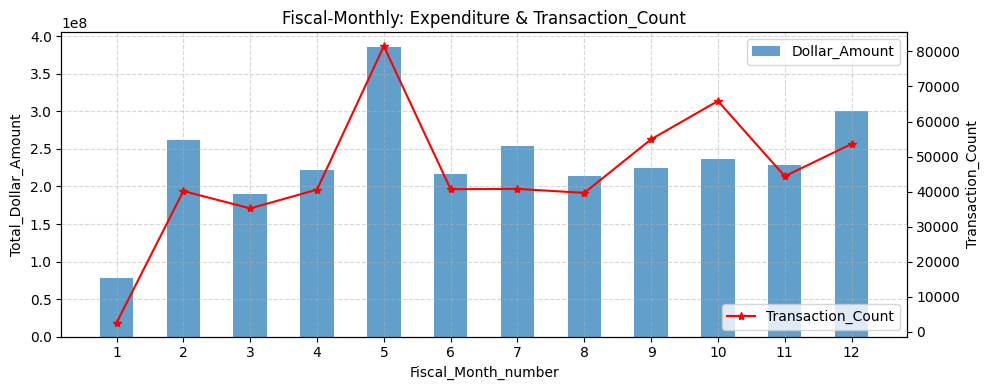

In [81]:
df = pd.DataFrame(_).sort_values(by='fiscal_month_number', ascending=True)

plt.figure(figsize=(10,4), tight_layout=True, facecolor='white')
plt.title('Fiscal-Monthly: Expenditure & Transaction_Count');
plt.grid(True, alpha=0.5, ls='--');
plt.xticks(range(1, 13));    plt.xlabel('Fiscal_Month_number');  

plt.bar(x='fiscal_month_number', height='total_dollar_amount', data=df, alpha=0.7, width=0.5, label='Dollar_Amount')
plt.legend();
plt.ylabel('Total_Dollar_Amount');

plt.twinx();
plt.plot(df['fiscal_month_number'], df['total_transaction_count'], marker='*', color='red', label='Transaction_Count');
plt.ylabel('Transaction_Count');
plt.legend(loc='lower right');

#### Quarterly

Combining data from the "checkbook" and "time" tables, linking them through the "time_key" column. It then groups the results by fiscal year-quarter, calculating the total dollar amount and transaction count for each quarter. The final output is ordered by fiscal year quarter, providing a concise summary of financial data across quarters for analysis.

In [82]:
%%sql
SELECT 
    t.fiscal_year_quarter,
    SUM(c.dollar_amount) AS total_dollar_amount,
    COUNT(*) AS total_transaction_count
FROM 
    checkbook AS c
JOIN 
    time AS t ON c.time_key = t.key
GROUP BY 
    t.fiscal_year_quarter
ORDER BY 
    t.fiscal_year_quarter;

 * postgresql://student@/final_project
4 rows affected.


fiscal_year_quarter,total_dollar_amount,total_transaction_count
2020-01,528506543,77956
2020-02,825886943,162760
2020-03,692809899,135347
2020-04,766507043,163859


Using pandas to plot on a quarterly basis.

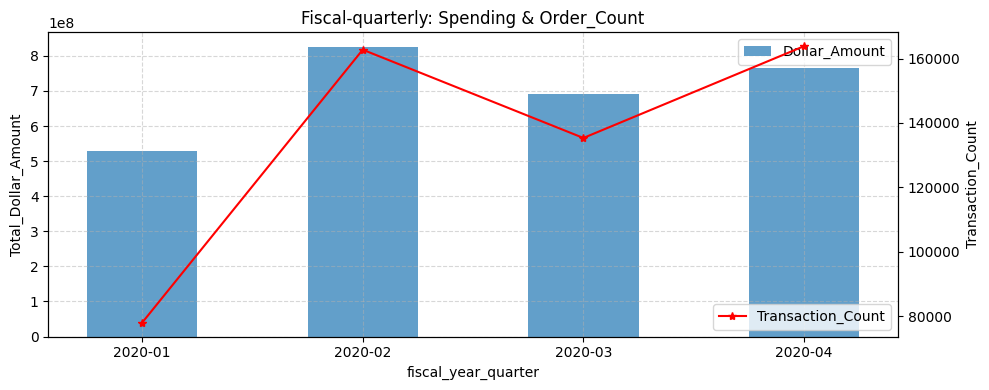

In [83]:
df = pd.DataFrame(_).sort_values(by='fiscal_year_quarter', ascending=True)

plt.figure(figsize=(10,4), tight_layout=True, facecolor='white')
plt.title('Fiscal-quarterly: Spending & Order_Count');
plt.grid(True, alpha=0.5, ls='--');
plt.xlabel('fiscal_year_quarter');  

plt.bar(x='fiscal_year_quarter', height='total_dollar_amount', data=df, alpha=0.7, width=0.5, label='Dollar_Amount')
plt.legend();
plt.ylabel('Total_Dollar_Amount');

plt.twinx();
plt.plot(df['fiscal_year_quarter'], df['total_transaction_count'], marker='*', color='red', label='Transaction_Count');
plt.ylabel('Transaction_Count');
plt.legend(loc='lower right');

#### Discoveries:
- ***Monthly:*** The graph displays a general upward trend in spending with some fluctuations. The transaction count appears more variable, with several peaks and troughs, indicating that the number of transactions does not increase consistently alongside expenditure. This suggests that higher spending may be due to a combination of an increased number of transactions and larger transaction amounts in certain months.

- ***Quaretly:*** The expenditure consistently increased from the first to the fourth quarter of 2020, the transaction count fluctuated with a notable dip in the third quarter before rising again. This suggests a possible increase in the average value of transactions over time, especially in the final quarter.

### QUESTION 1:
***What are the highest-ranking vendors based on the total dollar amount of orders? Additionally, what is the count of orders for each of these top three vendors, and what percentage does each vendor's order count contribute to the overall activity in the dataset?***

Information about the top five vendors based on the total dollar amount of transactions in the "checkbook" dataset. The main query then selects the vendor name, total dollar amount, transaction count, and the percentage of total transactions for each vendor. The results are grouped by vendor name, ordered by total dollar amount in descending order, and limited to the top five vendors.

In [84]:
%%sql
WITH TotalAmount AS (
    SELECT 
        SUM(dollar_amount) AS total_amount
    FROM 
        checkbook
)

SELECT 
    v.vendor_name,
    SUM(c.dollar_amount) AS total_dollar_amount,
    COUNT(c.dollar_amount) AS transaction_count,
    SUM(c.dollar_amount) / (SELECT total_amount FROM TotalAmount) * 100 AS percentage_of_total
FROM 
    checkbook AS c
JOIN
    vendor AS v ON c.vendor_key = v.key
CROSS JOIN
    TotalAmount

GROUP BY 
    v.vendor_name

ORDER BY 
    total_dollar_amount DESC
LIMIT 5;

 * postgresql://student@/final_project
5 rows affected.


vendor_name,total_dollar_amount,transaction_count,percentage_of_total
"VOYA HOLDINGS, INC.",344757329,152,4.06080058806313396700
SO CALIF PUBLIC PWR AUTH/SCPPA C/O OFFICE OF THE TREASURER,342719045,142,4.03679220834326533800
TURNER PCL A JOINT VENTURE,329937822,16,3.88624574128160048400
DELTA AIR LINES INC,226029349,6,2.66233676888338852800
SOUTHERN CALIFORNIA PERMANENTE MEDICAL GROUP,214302046,39,2.52420413206047546100


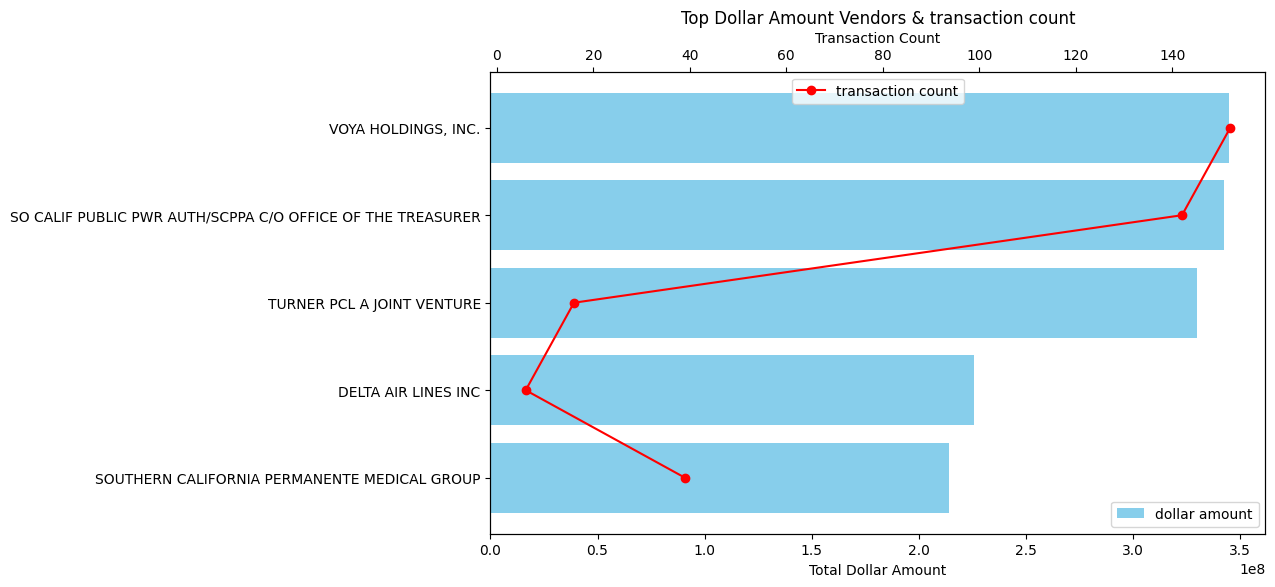

In [85]:
df = pd.DataFrame(_).sort_values(by='total_dollar_amount', ascending=True)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Top Dollar Amount Vendors & transaction count')

ax1.barh(y='vendor_name', width='total_dollar_amount', data=df, color='skyblue', label='dollar amount')
ax1.set_xlabel('Total Dollar Amount');
ax1.legend(loc='lower right')
# ax1.set_ylabel('Vendor')

ax2 = ax1.twiny();
ax2.plot(df['transaction_count'], df['vendor_name'], color='red', marker='o', label='transaction count')
ax2.set_xlabel('Transaction Count')

plt.legend(loc='upper center');

plt.show();

#### Discoveries:
Top-5 Vendors are:
1. Voya Holdings, Inc.: <u>$ 344,757,329</u>    VOYA is a financial services company that provides retirement, investment, and insurance products. In a government context, this expenditure could be related to pension fund management, employee retirement plans, or other financial services.

2. Southern California Public Power Authority: <u>$ 342,719,045</u> SCPPA is a joint powers authority consisting of municipal utilities and an irrigation district. The Office of the Treasurer likely handles financial transactions for a city or state. Expenditures here may relate to utility services or financial management services for public funds.

3. Turner PCL: <u>$ 329,937,822</u>   These are large construction companies that often form joint ventures for large-scale construction projects. Expenditures with this vendor would likely be for construction or major infrastructure projects.

4. Delta Airlines Inc.: <u>$ 226,029,349</u>    Delta is a major airline. Government expenditures with Delta could be for employee travel, transportation of officials, or other travel-related services.

5. Southern California Permanente Medical Group: <u>$ 214,302,046</u>    This is a medical organization that provides healthcare services. Expenditures with this group would likely be related to healthcare services for government employees or public health initiatives.

Information about the top five vendors based on the highest amount of transactions in the "checkbook" dataset. The main query then selects the vendor name, total dollar amount, transaction count, and the percentage of total transactions for each vendor. The results are grouped by vendor name, ordered by total dollar amount in descending order, and limited to the top five vendors.

In [86]:
%%sql
WITH TotalAmount AS (
    SELECT 
        SUM(dollar_amount) AS total_amount
    FROM 
        checkbook
)

SELECT 
    v.vendor_name,
    SUM(c.dollar_amount) AS total_dollar_amount,
    COUNT(c.dollar_amount) AS transaction_count,
    SUM(c.dollar_amount) / (SELECT total_amount FROM TotalAmount) * 100 AS percentage_of_total
FROM 
    checkbook AS c
JOIN
    vendor AS v ON c.vendor_key = v.key
CROSS JOIN
    TotalAmount

GROUP BY 
    v.vendor_name

ORDER BY 
    transaction_count DESC
LIMIT 5;

 * postgresql://student@/final_project
5 rows affected.


vendor_name,total_dollar_amount,transaction_count,percentage_of_total
KONICA MINOLTA BUSINESS SOLUTIONS,3925052,54975,0.04623209466209311600
OFFICE DEPOT BUSINESS SVCS DIV,3690778,43104,0.04347264644462562700
FALCON FUELS INC,25628667,20578,0.30187293284452333000
ROBERTSONS READY MIX,4034635,16535,0.04752284230807491400
PRIVACY-RECREATION AND PARKS,1801432,16304,0.02121856595818952900


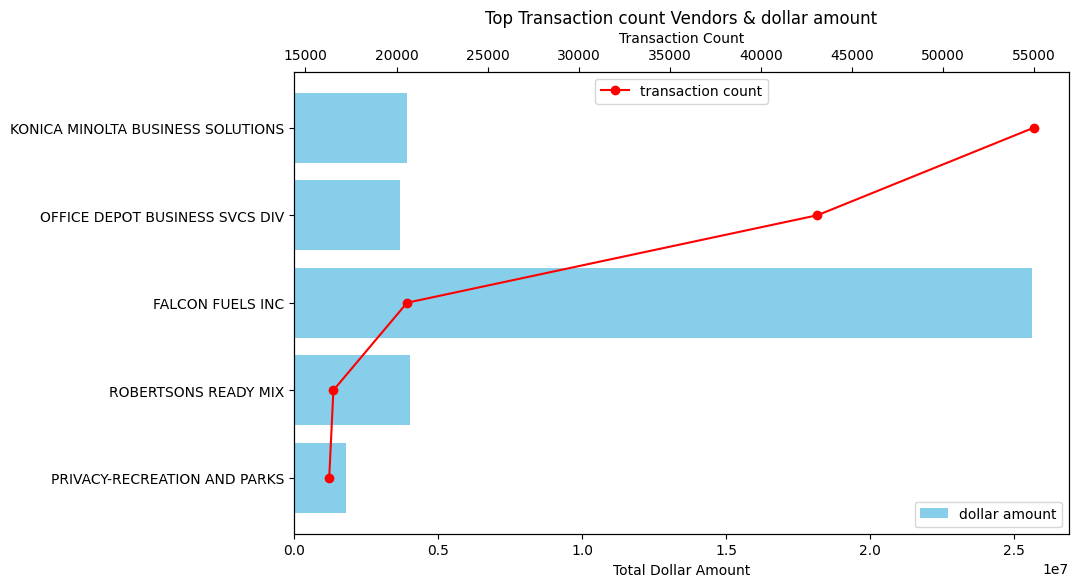

In [87]:
df = pd.DataFrame(_).sort_values(by='transaction_count', ascending=True)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Top Transaction count Vendors & dollar amount')

ax1.barh(y='vendor_name', width='total_dollar_amount', data=df, color='skyblue', label='dollar amount')
ax1.set_xlabel('Total Dollar Amount');
ax1.legend(loc='lower right')
# ax1.set_ylabel('Vendor')

ax2 = ax1.twiny();
ax2.plot(df['transaction_count'], df['vendor_name'], color='red', marker='o', label='transaction count')
ax2.set_xlabel('Transaction Count')

plt.legend(loc='upper center');

plt.show();

#### Discoveries:
Top-5 transaction count Vendors are:
1. Konica Minolta Business Solutions: <u>*54,975 transactions*</u>    Konica Minolta is a multinational technology company that specializes in business solutions, including office printing systems, digital presses, multifunctional products (MFPs), and IT services. They typically provide copiers, laser printers, and related services.

2. Office Depot Business SVCS Div: <u>*43,104 transactions*</u>    Office Depot provides a broad range of office supplies and services. This division would cater to business customers with products like stationery, furniture, technology equipment, and business services (such as printing and document services).

3. Falcon Fuels INC.: <u>*20,578 transactions*</u>    This company likely specializes in the provision of fuel products. They could be supplying gasoline, diesel, or other types of fuel for vehicles, equipment, and heating purposes.

4. Robertsons Ready Mix: <u>*16,535 transactions*</u>    Robertson's Ready Mix is a company that supplies ready-mixed concrete and building materials. Ready mix concrete is typically used in construction projects for everything from sidewalks and driveways to buildings and bridges.

5. Privacy-recreation and parks: <u>*16,304 transactions*</u>    it could be involved with municipal or regional services related to recreation and park management. This could include maintenance of park facilities, organization of recreational programs, and possibly conservation efforts.

### QUESTION 2:
***What departments exhibit higher spending, and how is the government budget allocated among various activities within these departments?***

Retrieving and summarizing spending information from the "checkbook" data by joining it with the "department" data. It retrieves the total dollar amount spent by each department, grouping the results by department name. The output is then ordered in descending order based on the total dollar amount, and only the top 10 departments are displayed. Identifying and presenting the highest-spending departments in the dataset.

In [88]:
%%sql
SELECT 
    d.department_name AS department_name,
    SUM(c.dollar_amount) AS total_dollar_amount,
    CONCAT(ROUND(100.0 * SUM(c.dollar_amount) / SUM(SUM(c.dollar_amount)) OVER (), 2), '%') AS individual_percentage,
    CONCAT('$ ',SUM(SUM(c.dollar_amount)) OVER (ORDER BY SUM(c.dollar_amount) DESC)) AS cumulative_total,
    CONCAT(ROUND(100.0 * SUM(SUM(c.dollar_amount)) OVER (ORDER BY SUM(c.dollar_amount) DESC) / SUM(SUM(c.dollar_amount)) OVER (), 2), '%') AS cumulative_percentage 
    
FROM 
    checkbook AS c
JOIN 
    department AS d ON c.department_key = d.key
GROUP BY 
    d.department_name
ORDER BY 
    total_dollar_amount DESC
LIMIT 10;

 * postgresql://student@/final_project
10 rows affected.


department_name,total_dollar_amount,individual_percentage,cumulative_total,cumulative_percentage
WATER AND POWER,2465801870,29.04%,$ 2465801870,29.04%
AIRPORTS,1778447571,20.95%,$ 4244249441,49.99%
NON_DEPARTMENTAL,1732687502,20.41%,$ 5976936943,70.40%
GENERAL SERVICES,335859880,3.96%,$ 6312796823,74.36%
TRANSPORTATION,243743469,2.87%,$ 6556540292,77.23%
HOUSING AND COMMUNITY INVESTMENT DEPARTMENT,241620058,2.85%,$ 6798160350,80.07%
HARBOR,219100261,2.58%,$ 7017260611,82.65%
PERSONNEL,173973397,2.05%,$ 7191234008,84.70%
PENSION,152348661,1.79%,$ 7343582669,86.50%
POLICE,116529144,1.37%,$ 7460111813,87.87%


Creating a combined horizontal bar chart and line plot for departmental spending. The horizontal bars represent total dollar amounts for each department, while the line plot shows cumulative percentages. The chart includes a secondary x-axis with an 80% mark for Pareto analysis.

- ***Pareto analysis:*** is also known as the 80/20 rule, which states that for many events, roughly 80% of the effects come from 20% of the causes. When applied to spending analysis, a Pareto chart can help identify the largest areas of expenditure, suggesting that focusing on these areas can have the most substantial impact on overall cost reduction or budget optimization.

Applying Pareto analysis to the top 10 departments in the LA checkbook data involves identifying and prioritizing the crucial few departments that contribute significantly to 80% of the financial impact. By focusing efforts on these key departments, the analysis can help aim to streamline resource allocation and decision-making for maximum efficiency in financial management.

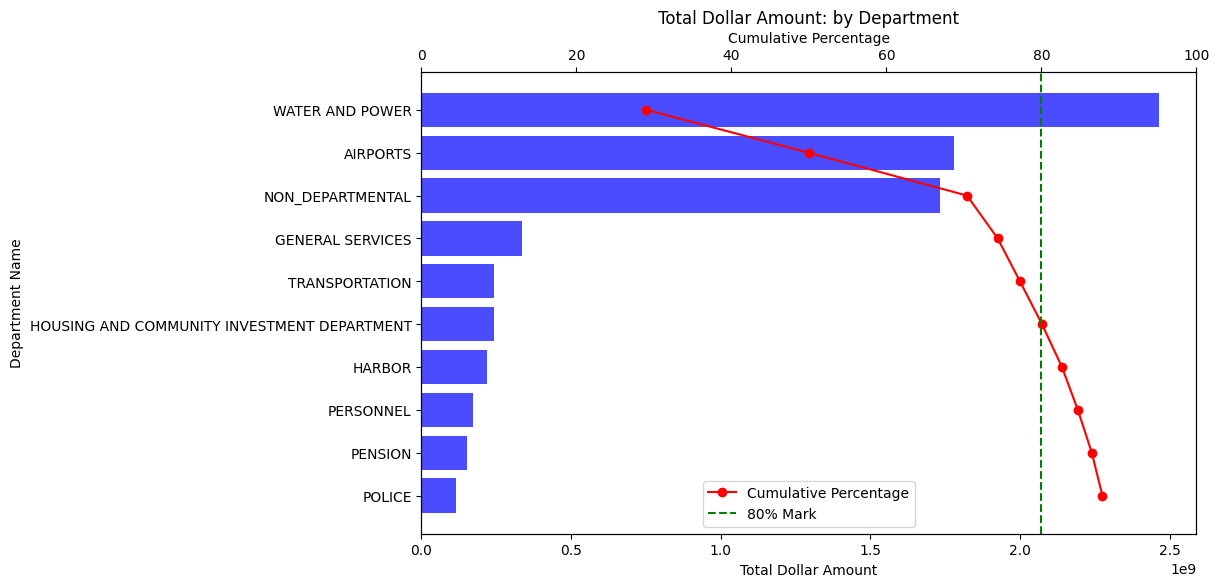

In [89]:
df = pd.DataFrame(_).sort_values(by='total_dollar_amount', ascending=True)

df['cumulative_percentage'] = df['cumulative_percentage'].str.rstrip('%').astype('float')

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Total Dollar Amount: by Department')

ax1.barh(y='department_name', width='total_dollar_amount', data=df, color='blue', alpha=0.7)
ax1.set_xlabel('Total Dollar Amount')
ax1.set_ylabel('Department Name')

ax2 = ax1.twiny();
ax2.plot(df['cumulative_percentage'], df['department_name'], color='red', marker='o', label='Cumulative Percentage')
ax2.set_xlim([0, 100])  # Set x-axis limit to ensure it reaches 100%
ax2.axvline(x=80, color='green', linestyle='--', label='80% Mark')
ax2.set_xlabel('Cumulative Percentage')

plt.legend(loc='lower center');

plt.show();

#### Discoveries & Insights:

1. **Concentration of Spending:** The top three departments by spending are "WATER AND POWER", "AIRPORTS", and "NON_DEPARTMENTAL". Together, they account for a significant portion (70.40%) of the total spending. 

    - The distribution of spending among the departments may reflect the priorities and policy decisions of the governing body. Significant spending in "WATER AND POWER" and "AIRPORTS" may reflect large infrastructure, maintenance, or operational costs associated with these sectors

2. **Threshold for Majority of Spending:** It takes only five departments ("WATER AND POWER", "AIRPORTS", "NON_DEPARTMENTAL", "GENERAL SERVICES", and "TRANSPORTATION") to exceed 77% of total spending, and the "HOUSING AND COMMUNITY INVESTMENT DEPARTMENT" pushes the cumulative spending just past the 80% threshold. This means that approximately 80% of the total spending is mostly concentrated within only the top 6 departments.
    - This aligns with the Pareto principle, which suggests that a small number of departments are responsible for a large proportion of the effects (spending).

3. **Smaller Departments:** The departments listed at the bottom ("PERSONNEL", "PENSION", "POLICE") have relatively small individual percentages (all below 3%)
    - While smaller departments like "POLICE" have a lower individual percentage, their essential services mean that any budget adjustments would need to be carefully considered to avoid compromising critical public services.
- This distribution of spending suggests that strategic financial management efforts should likely be concentrated on the top spending departments. However, it is also crucial to ensure that smaller departments are operating efficiently and are not overlooked simply because they have a smaller share of the spending.

We will check the activities into each department , and their distribution. Similar to what we have done before, finding the same for government activites. 
We are filtering for the departments that hit the 80% Pareto analysis mark.

Extracting financial data from the checkbook table, joined with the department and activity tables. It specifically focuses on departments such as 'WATER AND POWER', 'AIRPORTS', 'NON DEPARTMENTAL', 'GENERAL SERVICES', 'TRANSPORTATION', and 'HOUSING AND COMMUNITY INVESTMENT DEPARTMENT'. The results provide the total dollar amount spent on each government activity within these departments, along with the percentage of each activity's spending relative to the total spending within its corresponding department. The output is organized by department name, total dollar amount (in descending order), and government activity, offering insights into spending patterns and priorities across the selected departments.

In [90]:
%%sql
SELECT 
    d.department_name AS department_name,
    a.government_activity AS government_activity,
    SUM(c.dollar_amount) AS total_dollar_amount,
    ROUND(100.0 * SUM(c.dollar_amount) / SUM(SUM(c.dollar_amount)) OVER (PARTITION BY d.department_name), 2) AS percentage_of_total
FROM 
    checkbook AS c
JOIN 
    department AS d ON c.department_key = d.key
JOIN 
    activity AS a ON c.activity_key = a.key
WHERE
    d.department_name IN ('WATER AND POWER', 'AIRPORTS','NON DEPARTMENTAL','GENERAL SERVICES','TRANSPORTATION','HOUSING AND COMMUNITY INVESTMENT DEPARTMENT') 
GROUP BY 
    d.department_name, a.government_activity
ORDER BY 
    d.department_name, total_dollar_amount DESC, government_activity;

 * postgresql://student@/final_project
11 rows affected.


department_name,government_activity,total_dollar_amount,percentage_of_total
AIRPORTS,"TRANSPORTATION, COMMERCE AND/OR ENTERPRISE",1777456541,99.94
AIRPORTS,FINANCIAL SERVICES,991030,0.06
GENERAL SERVICES,GENERAL GOVERNMENT,324621626,96.65
GENERAL SERVICES,FINANCIAL SERVICES,11235141,3.35
GENERAL SERVICES,PROTECTION OF PERSONS AND PROPERTY,3113,0.00
HOUSING AND COMMUNITY INVESTMENT DEPARTMENT,COMMUNITY DEVELOPMENT,240895510,99.70
HOUSING AND COMMUNITY INVESTMENT DEPARTMENT,PROTECTION OF PERSONS AND PROPERTY,724820,0.30
HOUSING AND COMMUNITY INVESTMENT DEPARTMENT,FINANCIAL SERVICES,-272,0.00
TRANSPORTATION,"TRANSPORTATION, COMMERCE AND ENTERPRISE",243743469,100.00
WATER AND POWER,"TRANSPORTATION, COMMERCE AND ENTERPRISE",2465796870,100.00


#### Discoveries and Insights:
The government's activities under each department are classified into main activity and financial services. 
Financial Services activities concentrate on the financial management and planning necessary to support those operations.
Almost more than 97% of each department's allotted budget is spent on the main activities. 
- **Airports**: These are divided into 'TRANSPORTATION, COMMERCE AND/OR ENTERPRISE' and 'FINANCIAL SERVICES.' 99.94 of the total spending by airports is towards 'TRANSPORTATION, COMMERCE AND/OR ENTERPRISE.' 
- **General Services**: It is divided into 'GENERAL GOVERNMENT,' 'FINANCIAL SERVICES', and 'PROTECTION OF PERSONS AND PROPERTY. 96.65% is spent on 'GENERAL GOVERNMENT,' 3.35 to 'FINANCIAL SERVICES.'
- **Housing and Community Investment Department**: Most expenditure is on community development.
- **Transportation** and **Water**: Both these departments' complete expenditure is towards 'TRANSPORTATION, COMMERCE and ENTERPRISE.'

### QUESTION 3:
***Which departments use most of the Special Revenue funds and the Capital Projects funds?***

Retrieving financial data from the "checkbook" table, associating it with department and fund information through joins with the "department" and "fund" tables. The results are filtered to include only entries where the fund type is 'SPECIAL REVENUE'. The query then calculates the total dollar amount for each department-fund combination and adds columns for cumulative total and cumulative percentage of spending. The cumulative total is presented in descending order, providing insights into the distribution of spending across departments and funds within the 'SPECIAL REVENUE' category.

In [91]:
%%sql
SELECT 
    d.department_name AS department_name,
    f.fund_type AS fund_type,
    SUM(c.dollar_amount) AS total_dollar_amount,
    count(c.dollar_amount) AS total_count,
    --CONCAT('$ ',SUM(SUM(c.dollar_amount)) OVER (ORDER BY SUM(c.dollar_amount) DESC)) AS cumulative_total,
    CONCAT(ROUND(100.0 * SUM(SUM(c.dollar_amount)) OVER (ORDER BY SUM(c.dollar_amount) DESC) / SUM(SUM(c.dollar_amount)) OVER (), 2), '%') AS cumulative_percentage 
FROM 
    checkbook AS c
JOIN 
    department AS d ON c.department_key = d.key
JOIN 
    fund AS f ON c.fund_key = f.key
WHERE
    fund_type = 'SPECIAL REVENUE'
GROUP BY 
    d.department_name, f.fund_type
ORDER BY 
    total_dollar_amount DESC

 * postgresql://student@/final_project
29 rows affected.


department_name,fund_type,total_dollar_amount,total_count,cumulative_percentage
NON_DEPARTMENTAL,SPECIAL REVENUE,276968288,4199,25.11%
TRANSPORTATION,SPECIAL REVENUE,216980703,6113,44.78%
HOUSING AND COMMUNITY INVESTMENT DEPARTMENT,SPECIAL REVENUE,100950739,8513,53.93%
CITY CLERK,SPECIAL REVENUE,78385863,935,61.04%
ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,SPECIAL REVENUE,60691668,3515,66.54%
GENERAL SERVICES,SPECIAL REVENUE,56317995,2821,71.65%
RECREATION AND PARKS,SPECIAL REVENUE,47100033,56499,75.92%
FIRE,SPECIAL REVENUE,32418627,2036,78.86%
MAYOR,SPECIAL REVENUE,31836943,1169,81.75%
RECREATION AND PARKS - SPECIAL ACCOUNTS,SPECIAL REVENUE,31715838,6873,84.62%


Pandas to generate a dual-axis visualization for departments under the 'Special Revenue' fund type. The horizontal bar chart displays total dollar amounts for each department, while the line plot on the secondary axis depicts the cumulative percentage of spending. The green dashed line at 80% signifies the point where roughly 80% of the total spending is achieved. This real-time visualization offers a concise view of departmental spending distribution within the 'Special Revenue' category, emphasizing key contributors to the cumulative total.

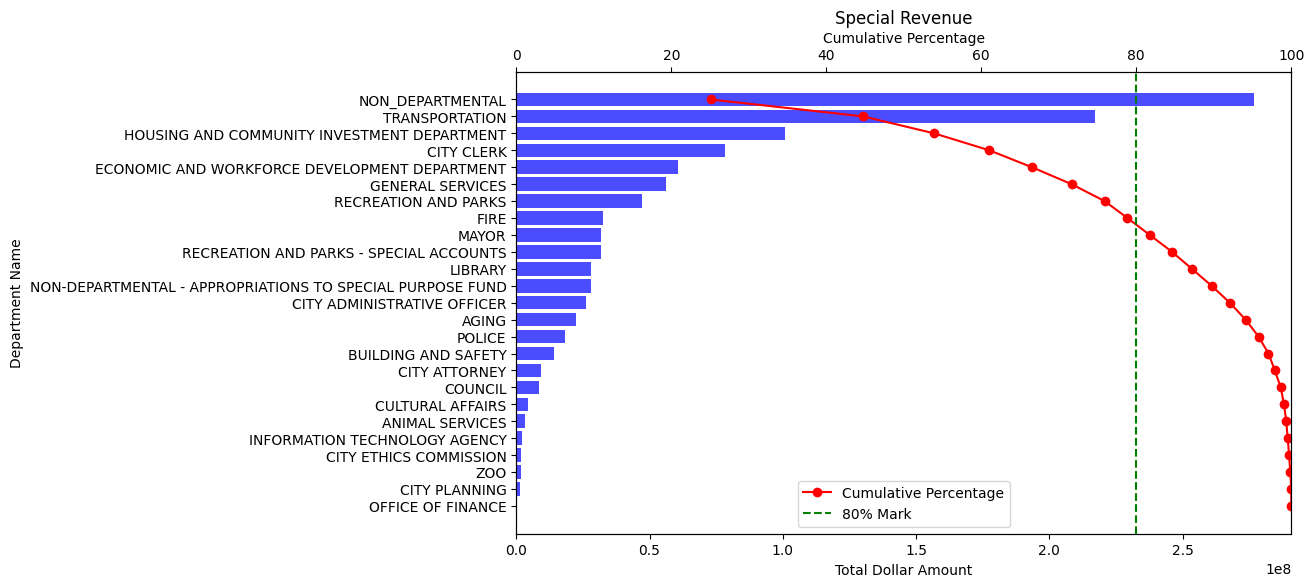

In [92]:
df = pd.DataFrame(_).sort_values(by='total_dollar_amount', ascending=True).iloc[4:, :]

df['cumulative_percentage'] = df['cumulative_percentage'].str.rstrip('%').astype('float')

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Special Revenue')

ax1.barh(y='department_name', width='total_dollar_amount', data=df, color='blue', alpha=0.7)
ax1.set_xlabel('Total Dollar Amount')
ax1.set_ylabel('Department Name')

ax2 = ax1.twiny();
ax2.plot(df['cumulative_percentage'], df['department_name'], color='red', marker='o', label='Cumulative Percentage')
ax2.set_xlim([0, 100])  # Set x-axis limit to ensure it reaches 100%
ax2.axvline(x=80, color='green', linestyle='--', label='80% Mark')
ax2.set_xlabel('Cumulative Percentage')

plt.legend(loc='lower center');

plt.show();

#### Discoveries & Insights:
***Special revenue fund*** is a designated account created by a government to gather funds earmarked for a specific project. These funds offer an additional layer of accountability and transparency, assuring taxpayers that their contributions will be allocated for the intended purpose.

1. **Top Departments by Special Revenue:** The "NON_DEPARTMENTAL", "TRANSPORTATION", and "HOUSING AND COMMUNITY INVESTMENT DEPARTMENT" are the top three entities in terms of total dollar amount from special revenue funds.

2. **Cumulative Impact:** There is a noticeable cumulative impact of spending from these funds as we move down the list. The "TRANSPORTATION" department alone accounts for nearly 45% of the special revenue fund spending, and along with "NON_DEPARTMENTAL", they comprise over 70% of the total special revenue fund expenditure.

3. **Efficiency and Efficacy:** The efficient use of special revenue funds should be regularly reviewed to ensure that these targeted funds are making the intended impact. Departments with lower allocations may need to be audited for efficiency or to argue a case for increased funding.

**For capital project funds**

Checking the financial activity for 'CAPITAL PROJECTS' funds in the "checkbook" dataset. It calculates the total dollar amount and transaction count for each department and fund type combination, grouping the results accordingly. The output is ordered in descending order based on the total dollar amount, providing a concise overview of expenditure patterns in capital projects across different departments and fund types.

In [93]:
%%sql
SELECT 
    d.department_name AS department_name,
    f.fund_type AS fund_type,
    SUM(c.dollar_amount) AS total_dollar_amount,
    count(c.dollar_amount) AS total_count
FROM 
    checkbook AS c
JOIN 
    department AS d ON c.department_key = d.key
JOIN 
    fund AS f ON c.fund_key = f.key
WHERE
    fund_type = 'CAPITAL PROJECTS'
GROUP BY 
    d.department_name, f.fund_type
ORDER BY 
    total_dollar_amount DESC

 * postgresql://student@/final_project
7 rows affected.


department_name,fund_type,total_dollar_amount,total_count
HOUSING AND COMMUNITY INVESTMENT DEPARTMENT,CAPITAL PROJECTS,78845662,451
NON_DEPARTMENTAL,CAPITAL PROJECTS,30267967,237
CITY ADMINISTRATIVE OFFICER,CAPITAL PROJECTS,20290760,435
RECREATION AND PARKS,CAPITAL PROJECTS,16877499,1810
RECREATION AND PARKS - SPECIAL ACCOUNTS,CAPITAL PROJECTS,6598136,628
TRANSPORTATION,CAPITAL PROJECTS,5235053,149
NON-DEPARTMENTAL - APPROPRIATIONS TO SPECIAL PURPOSE FUND,CAPITAL PROJECTS,191227,89


#### Discoveries & Insights:​

Discoveries:​

- The "HOUSING AND COMMUNITY INVESTMENT DEPARTMENT" has the highest capital project expenditure, suggesting large, individual projects in housing and community infrastructure.​

- "RECREATION AND PARKS" shows a high transaction count but not the highest funding, indicating many smaller-scale projects or purchases, as opposed to fewer, larger transactions in departments like "HOUSING AND COMMUNITY INVESTMENT". This could indicate ongoing or numerous smaller projects, requiring continual funding. ​  ​

Insights:​

- Investment Priorities: The data suggests prioritization of housing and community development in capital expenditures, reflecting policy emphasis on these areas.​

- Efficiency Potential: Departments with high transaction counts but lower total expenditures might benefit from efficiency reviews to optimize procurement and project management processes.​

- Fiscal Strategy: The presence of "NON_DEPARTMENTAL" spending indicates strategic financial management, where funds may be allocated for cross-departmental projects or citywide initiatives not confined to a single department.​

Now we are digging deeper into what project used "capital projects" fund the most within the top-spent department. The final output includes the department name, fund type, maximum spent amount, purchase order number, and description for the top spending transaction in each specified department within the context of capital projects.

In [5]:
%%sql
SELECT 
    sub.department_name,
    sub.fund_type,
    sub.MAX_spent,
    sub.po_num,
    sub.description
FROM (
    SELECT 
        d.department_name AS department_name,
        f.fund_type AS fund_type,
        c.dollar_amount AS spent,
        p.po_num AS po_num,
        c.description AS description,
        MAX(c.dollar_amount) OVER (PARTITION BY d.department_name) AS MAX_spent,
        ROW_NUMBER() OVER (PARTITION BY d.department_name ORDER BY c.dollar_amount DESC) AS rn
    FROM 
        checkbook AS c
    JOIN 
        department AS d ON c.department_key = d.key
    JOIN 
        fund AS f ON c.fund_key = f.key
    JOIN
        po_line AS p ON c.po_line_key = p.key
    WHERE
        f.fund_type = 'CAPITAL PROJECTS'
        AND d.department_name IN ('HOUSING AND COMMUNITY INVESTMENT DEPARTMENT', 'NON_DEPARTMENTAL', 'CITY ADMINISTRATIVE OFFICER', 'RECREATION AND PARKS', 'TRANSPORTATION')
) sub
WHERE sub.rn = 1
ORDER BY 
    max_spent DESC

 * postgresql://student@/final_project
5 rows affected.


department_name,fund_type,max_spent,po_num,description
HOUSING AND COMMUNITY INVESTMENT DEPARTMENT,CAPITAL PROJECTS,3698365,SC43CO20134396Y,"SC FOR MELROSE PSH, L.P C-134396"
NON_DEPARTMENTAL,CAPITAL PROJECTS,2043845,SC50CO19131878KO,"OHL USA INC-CO#131878, ARGO"
TRANSPORTATION,CAPITAL PROJECTS,1885731,SC94CO19127318M,BIKE SHARE PHASE III
RECREATION AND PARKS,CAPITAL PROJECTS,879543,GAE88RE20010548M,"#21254 BROOKLYN HEIGHTS PARK ACQUISITION, CROWN ESCROW CORP"
CITY ADMINISTRATIVE OFFICER,CAPITAL PROJECTS,750000,SC10CO19003645KC,"ENC. $4,588,206.00 FROM PROP K 43K/10/VARIOUS APPRUNITS"


#### Discoveries and Insights:
***Capital projects funds:*** Funds are used to account for financial resources used for the acquisition or construction of capital facilities. These include land, improvements to land, buildings and building improvements and infrastructure. Examples: Infrastructure projects such as railways, roads, and dams.

**Discoveries:**
- **High-Value Projects:** The "HOUSING AND COMMUNITY INVESTMENT DEPARTMENT" has incurred the highest maximum expenditure on a single project, indicating a significant investment in a housing-related initiative.
- **Diverse Capital Projects:** The capital projects span across different sectors, from administrative actions (as suggested by the expense in the "CITY ADMINISTRATIVE OFFICER" department) to housing, public works, park acquisition, and transportation. And the descriptions suggest a variety of capital project types, from housing investments and park acquisitions to infrastructure for transportation.

**Insights:**
- **Investment in Public Services:** There's a clear investment in community services and infrastructure, such as parks and transportation, which can enhance the quality of life for residents.
- **Focus on Housing:** The significant expenditure in the "HOUSING AND COMMUNITY INVESTMENT DEPARTMENT" suggests a focused effort on housing development, possibly addressing housing affordability or homelessness.
- **Sustainable Transportation:** The investment in "BIKE SHARE PHASE III" within the "TRANSPORTATION" department reflects a commitment to sustainable and alternative transportation options.